In [1]:
# Import libraries for data manipulation, plotting and analysis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset from a CSV file into a pandas DataFrame.
df= pd.read_csv("ds_salaries.csv")

In [3]:
# Display the first few rows of the DataFrame to get a glimpse of the data structure and content.
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# Drop the 'Unnamed: 0' column as they are not needed for the analysis.
df.drop(columns = ['Unnamed: 0'], inplace=True)

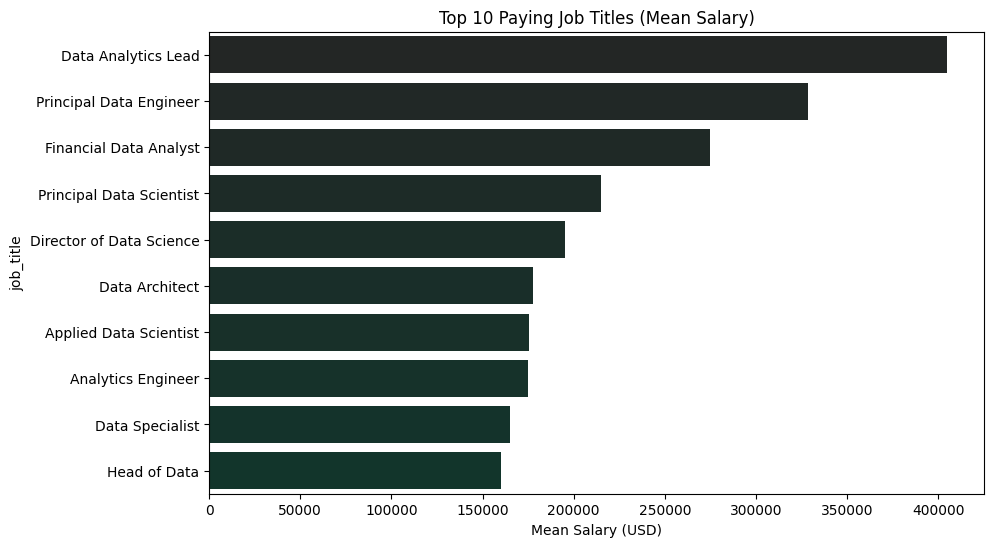

In [5]:
plt.figure(figsize=(10, 6))
plt.subplot()
top_paying = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_paying.values, y=top_paying.index, palette='dark:#0C3B2E')
plt.title('Top 10 Paying Job Titles (Mean Salary)')
plt.xlabel('Mean Salary (USD)')
plt.show()

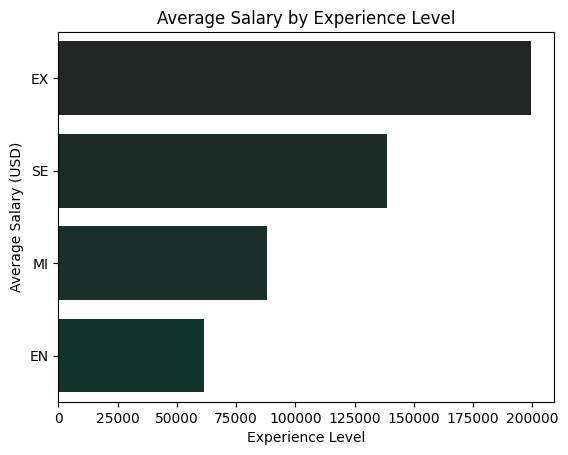

In [6]:
# Calculate average salary by experience level
avg_salary = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
plt.subplot()
sns.barplot(x=avg_salary.values, y=avg_salary.index, palette= 'dark:#0C3B2E')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.show()

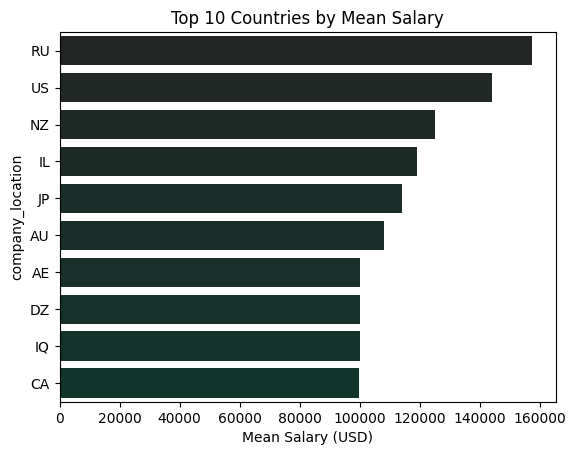

In [7]:
# Top 10 countries by average salary
top_countries = df.groupby('company_location')['salary_in_usd'].mean().nlargest(10)
plt.subplot()
sns.barplot(x=top_countries.values, y=top_countries.index, palette='dark:#0C3B2E')  # Dark greenish tone
plt.title('Top 10 Countries by Mean Salary')
plt.xlabel('Mean Salary (USD)')
plt.show()

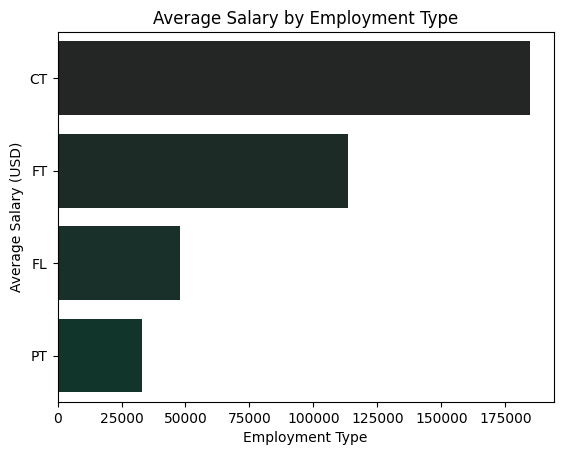

In [8]:
avg_salary = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)
plt.subplot()
sns.barplot(x=avg_salary.values, y=avg_salary.index, palette='dark:#0C3B2E')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.show()

In [9]:
# Import LabelEncoder for transforming categorical labels into numerical representations.
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
# Define a function to visualize outliers using box plots for numeric columns.
def outliers(x):
  y=x.select_dtypes(include=[int,float])
  for i in y:
    sns.boxplot(x=df[i],color='#0C3B2E')
    plt.title(i)
    plt.show()

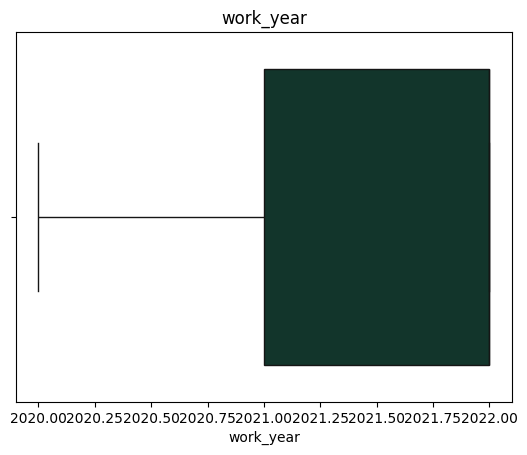

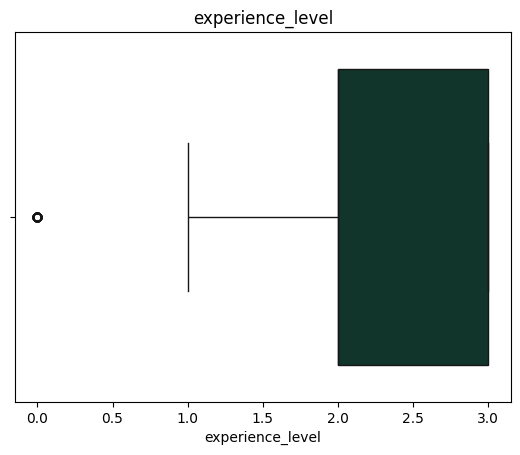

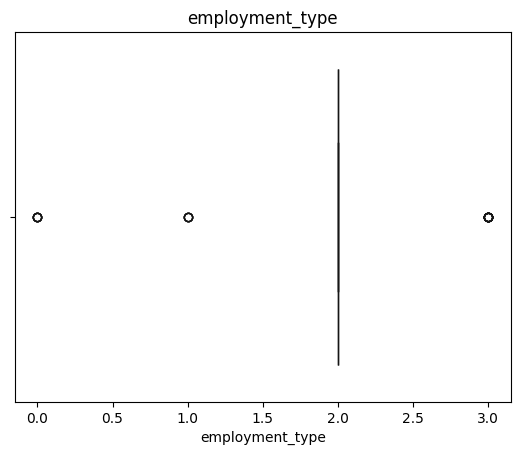

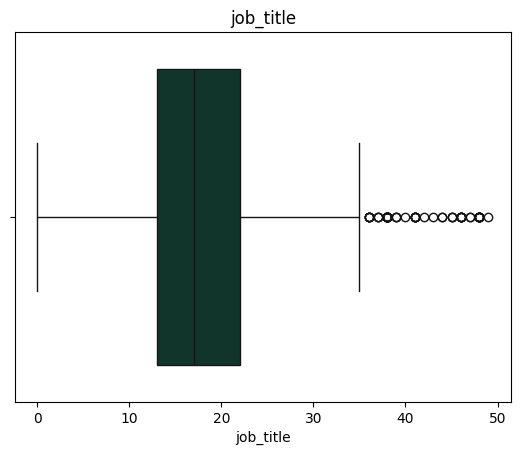

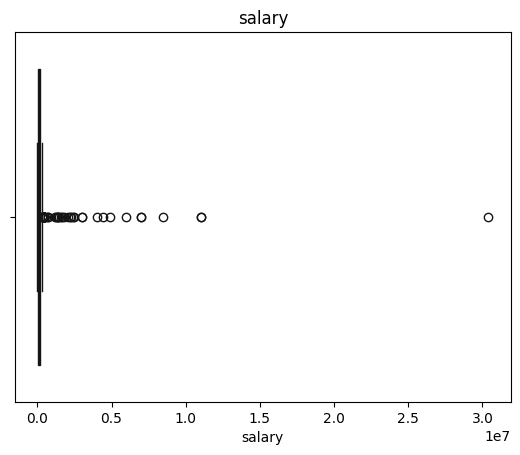

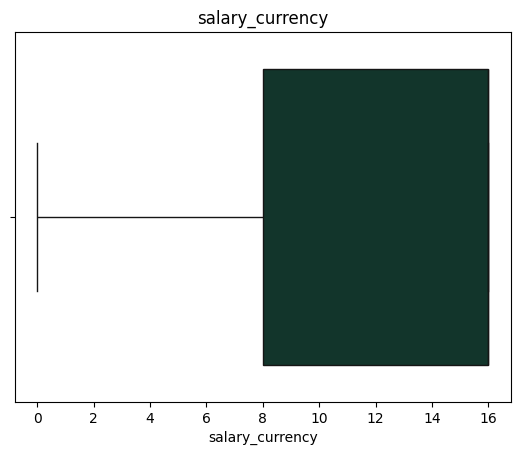

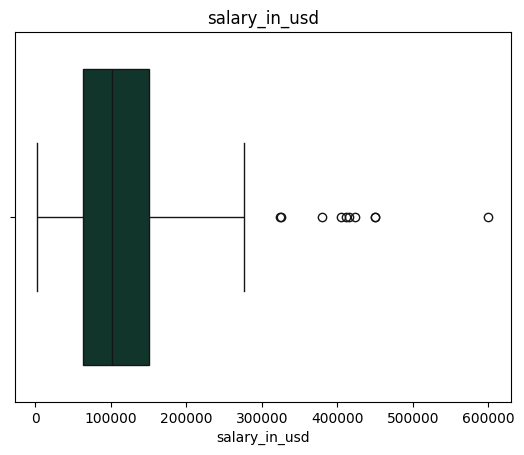

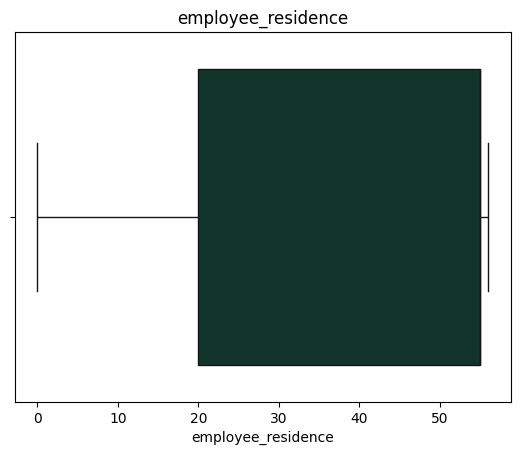

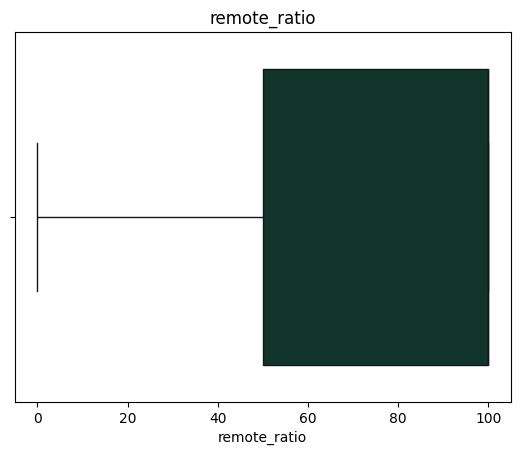

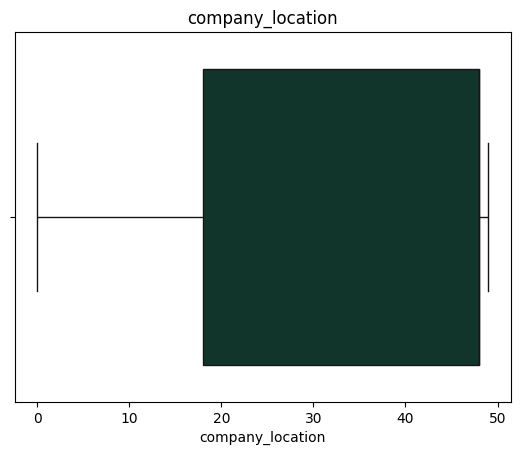

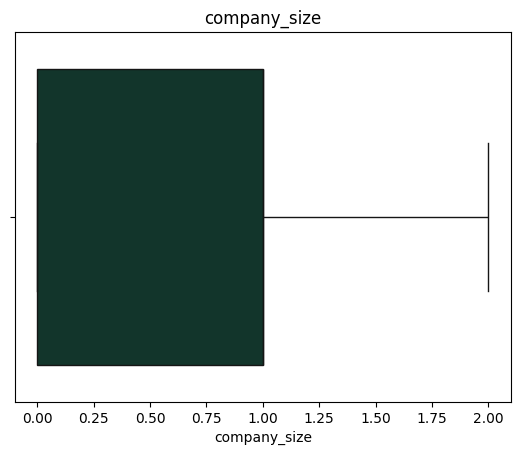

In [11]:
outliers(df)

In [12]:
# Define a function to remove outliers from specified columns using the Interquartile Range (IQR) method.
def remove_outliers_iqr(df, columns):
    clean_df = df.copy()
    for col in columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
    return clean_df

In [13]:
# Identify numeric columns in the DataFrame.
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove outliers from the numeric columns using the defined function.
df = remove_outliers_iqr(df, numeric_columns)

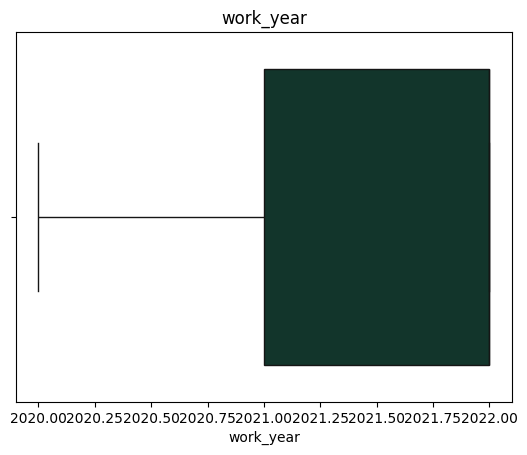

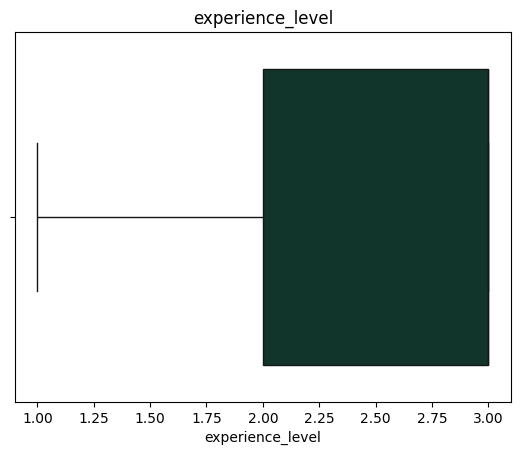

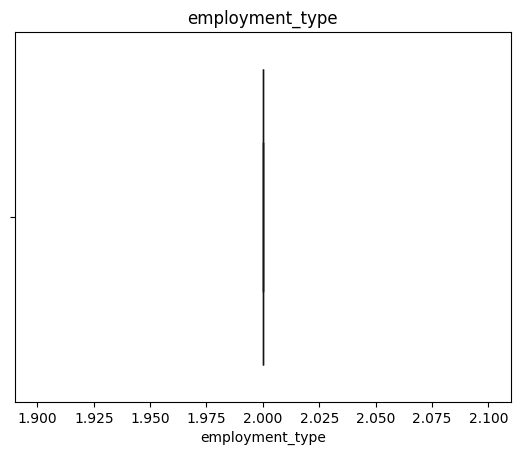

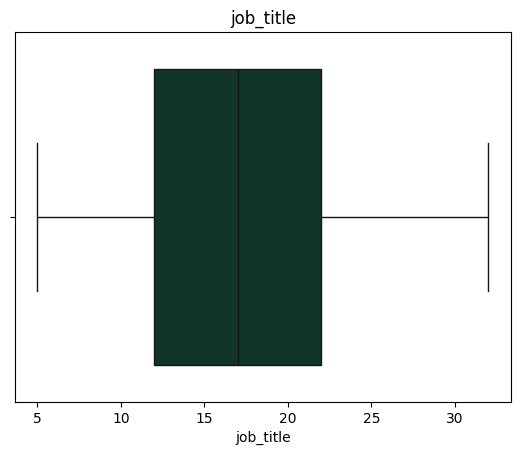

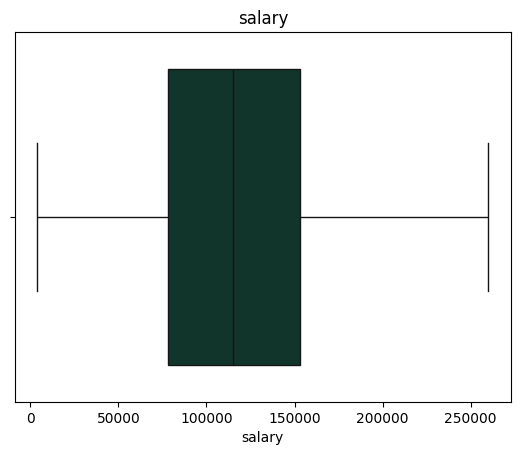

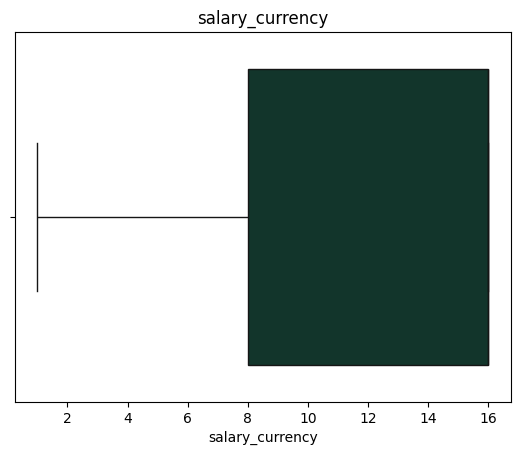

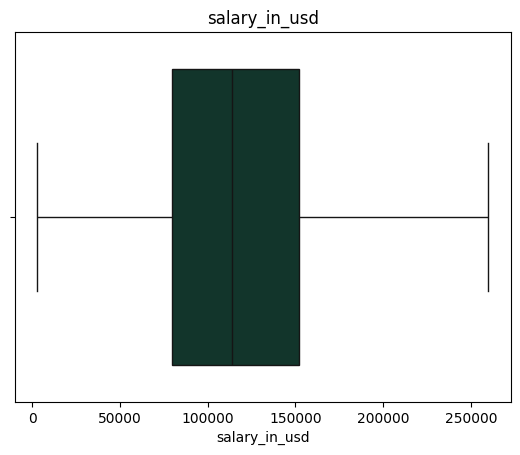

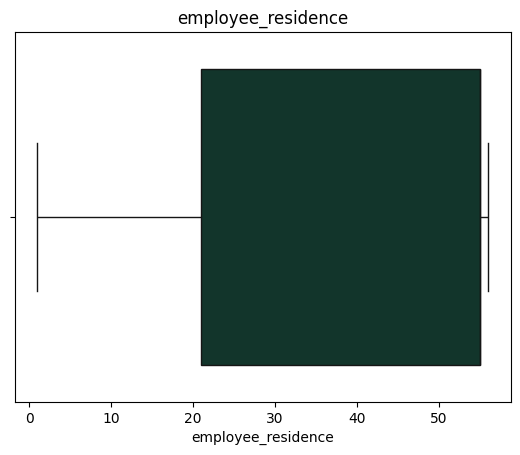

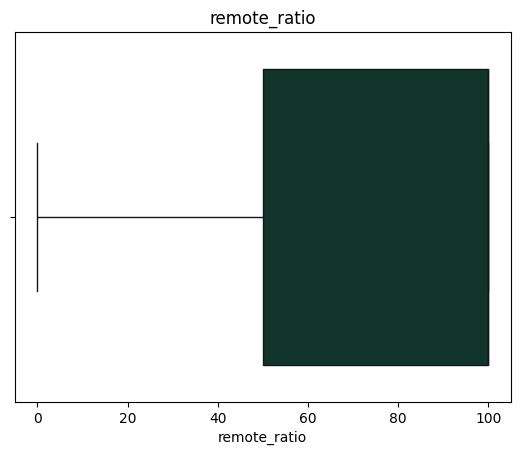

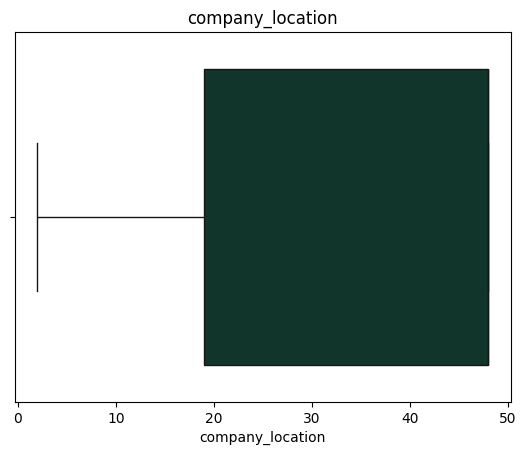

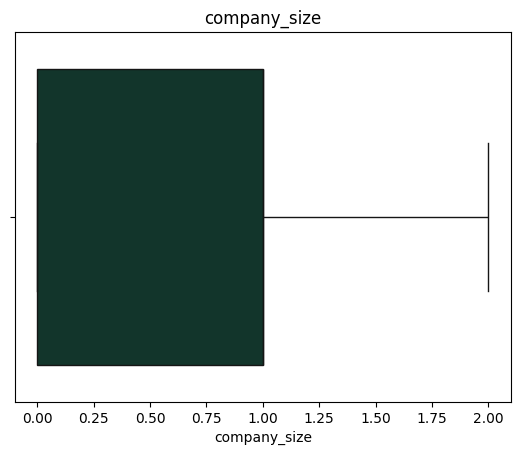

In [14]:
outliers(df)

In [15]:
# Separate the features (X) and the target variable (y).
X = df.drop(['salary_in_usd','employment_type'], axis=1)
y = df['salary_in_usd']

In [16]:
# Import the train_test_split function from sklearn.model_selection to split the data into training and testing sets.
from sklearn.model_selection import train_test_split

In [17]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Import the RandomForestRegressor model from sklearn.ensemble for building a regression model.
from sklearn.ensemble import RandomForestRegressor

In [19]:
# Initialize a RandomForestRegressor model with a specified random state for reproducibility.
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Import the accuracy metric from sklearn.metrics to evaluate the performance of the regression model.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
# Make predictions on the training & testing data.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Training R² Score:", r2_score(y_train, y_train_pred))
print("Testing R² Score:", r2_score(y_test, y_test_pred))
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Testing MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))


Training R² Score: 0.9821544113087979
Testing R² Score: 0.9544236911267024
Training MAE: 2039.1328295819933
Testing MAE: 5634.243461538462
Training MSE: 46126323.35682541
Testing MSE: 159406633.65815252


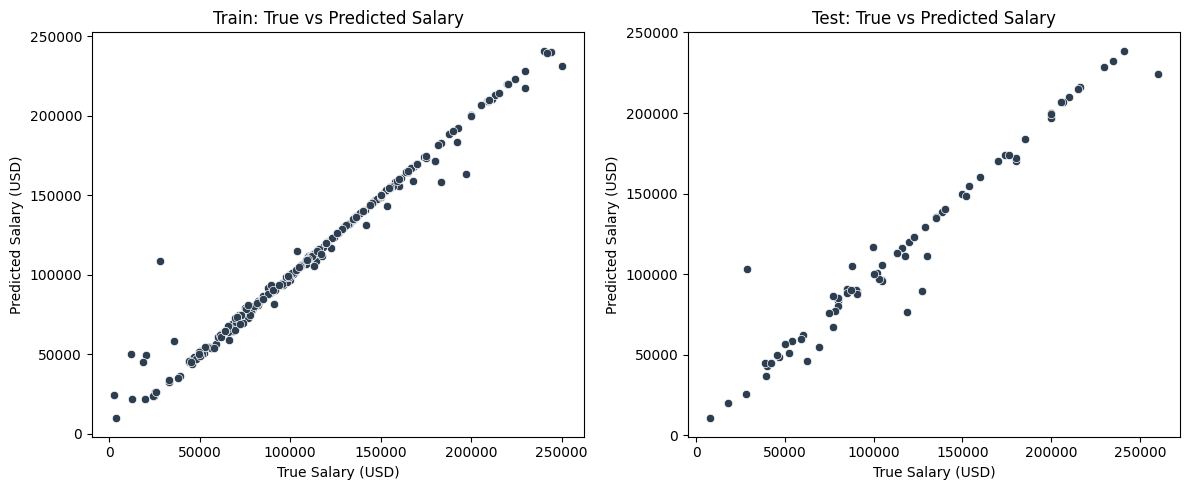

In [22]:
# Train: True vs Predicted
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, color= '#2C3E50')
plt.title("Train: True vs Predicted Salary")
plt.xlabel("True Salary (USD)")
plt.ylabel("Predicted Salary (USD)")

# Test: True vs Predicted
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred,color= '#2C3E50')
plt.title("Test: True vs Predicted Salary")
plt.xlabel("True Salary (USD)")
plt.ylabel("Predicted Salary (USD)")

plt.tight_layout()
plt.show()


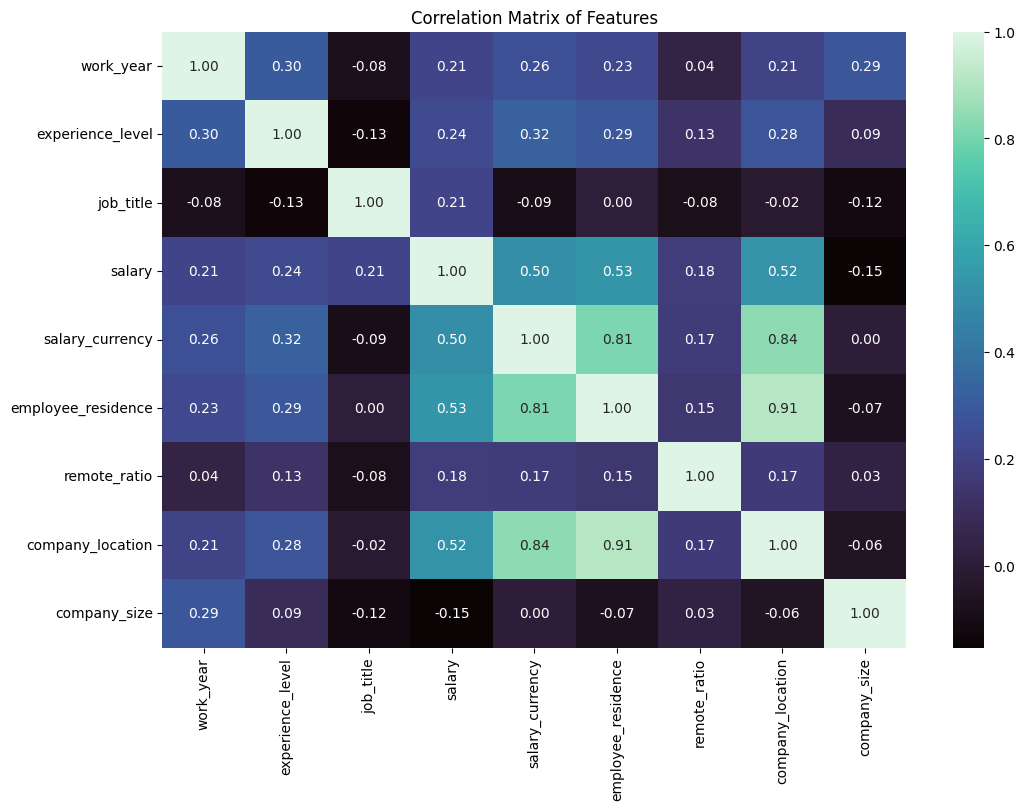

In [23]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()